# Introduction to Artificial Intelligence: HS 2023


---

## Lecture 4: Linear Models for Regression

Linear regression is a **supervised learning** technique used to find the relationship between dependent variable $y$ and one or more independent variables $x$ by fitting a corresponding line.

## Representing Hypotheses

We will use $x_i$ to represent the independent variable and $y_i$ to represent the dependent variable. Each pair of ${(x_i, y_i)}$ is referred to as a training example. The subscript $i$ in this notation simply serves as an index within the training set, and if we have $m$ training examples, then $i$ takes on values from $1$ to $m$.

The objective of supervised learning is to establish a *hypothesis function $h$* based on a given training set. This function enables us to estimate $y$ based on $x$. The hypothesis function can be represented as follows:


For **Simple/Univariate Linear Regression**:

$${f_w(x_{i}) = w_0 + w_1x_i}$$

where, ${w_0}$ and ${w_1}$ are the parameters of the hypothesis, and this equation embodies the concept of simple linear regression.

In the case of **Multiple Linear Regression**, where there are more than one independent variable, we will use ${x_{ij}}$ to denote independent variables and ${y_{i}}$ to denote the dependent variable. If we have ${n}$ independent variables, then ${j}$ ranges from 1 to ${n}$. The hypothesis function for multiple linear regression is represented as:

$$f_w(x_{i}) = w_0 + w_1x_{i1} + w_2x_{i2} + \ldots + w_jx_{ij} + \ldots + w_nx_{in}$$

Here, $w_0, w_1, \ldots, w_j, \ldots, w_n$ are the parameters of the hypothesis, $m$ represents the number of training examples, $n$ represents the number of independent variables, and $x_{ij}$ is the $i^{th}$ training example of the $j^{th}$ feature.

## 0 - Loading Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1 - Loading the Dataset into a Pandas DataFrame


### Medical Cost Personal Datasets

This dataset explains the cost of a small sample of USA population Medical Insurance Cost based on some attributes such as age, sex, BMI, etc.
The dataset contains 1338 rows and 7 columns, including age, sex, BMI, number of children, smoker, region, and charges:

*   `age:` age of primary beneficiary
*   `gender:` insurance contractor gender, female, male
*   `bmi:` Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
*   `children:` Number of children covered by health insurance / Number of dependents
*   `smoker:` Smoking
*   `region:` the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

*   `charges:` Individual medical costs billed by health insurance

References:
-  Machine Learning with R by Brett Lantz, [URL](https://github.com/stedy/Machine-Learning-with-R-datasets).

We first load the CSV Iris Dataset into a Pandas `DataFrame` object:

In [ ]:
df_insurance = pd.read_csv('sample_data/insurance.csv')

Next, we display the first 5 rows:

In [ ]:
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


and then we also display the last 5 rows:

In [ ]:
df_insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


We can also display the size of our dataset, which is in the form of a Pandas `DataFrame`:

In [ ]:
# provide an overview of the different column data types and missing values:
df_insurance.shape

(1338, 7)

In [ ]:
# Now, display the datasets statistics, e.g. for each column, we compute its: mean, mix, max, values
print("\nSummary Statistics:")
df_insurance.describe()


Summary Statistics:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# provide an overview of the different column data types and missing values:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Our target variable is `charges`, whilst the remaining six variables (`age`, `sex`, `bmi`, `children`, `smoker`, `region`) represent our independent variables. As we are dealing with multiple independent variables, so we need to fit Multiple linear regression. Our hypothesis function looks as follows:

$$f_{w}(x_{i}) = w_0 + w_1 \cdot \text{age} + w_2 \cdot sex + w_3 \cdot bmi + w_4 \cdot children + w_5 \cdot smoker + w_6 \cdot region$$




In this sense, if we fit the values of the first sample $x_{i=1}$, we obtain the following function:
$$f_{w}(x_{i}) = w_0 + w_1 \cdot 19 + w_2 \cdot \text{female} + w_3 \cdot 27.90 + w_4 \cdot 1 + w_5 \cdot \text{yes} + w_6 \cdot \text{southwest}$$

By analysing the last sample $x_{i=1337}$, we obtain the following function:
$$f_{w}(x_{i}) = w_0 + w_1 \cdot 61 + w_2 \cdot \text{female} + w_3 \cdot 29.07 + w_4 \cdot 0 + w_5 \cdot \text{yes} + w_6 \cdot \text{northwest}$$

## 2 - Exploring the Dataset

In [ ]:
# We start by exploring potential nan columns. If this is the case, we should think about the proper strategy to deal with missing data, e.g. filling values or removing data samples (x_i, y_i):
df_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# Next, we have a look whether there are any duplicated samples. We do this, by counting first potential duplicated rows.
df_insurance.duplicated().sum()

1

In [ ]:
# Now, we display what are the rows that are actually duplicated.
df_insurance[df_insurance.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
# Then, we proceed to remove the duplicated rows.
# Hint: have a look at the drop_duplicates() method
df_insurance = df_insurance.drop_duplicates()
df_insurance.duplicated().sum()

0

Text(0.5, 1.0, 'Charges Distributions')

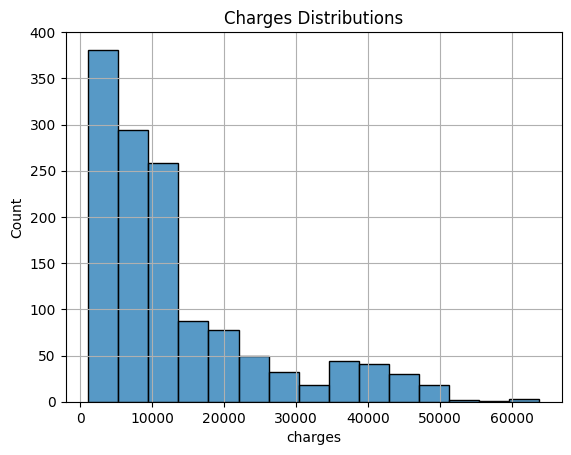

In [ ]:
# To have an idea about the 'charges' in our dataset, we plot the different values as a histogram.
# Hint: explore seaborn's histplot() function to display the charges stored in your dataframe
sns.histplot(data=df_insurance, x='charges', bins=15)
plt.grid()
plt.title('Charges Distributions')

In [ ]:
# The function below, takes as input a given dataframe and also a column name contained
# in that dataframe. You don't need to change anything here.
def charges_vs_category(df, col):
    fig = plt.figure(figsize=(8,6))
    sns.histplot(data=df, x='charges', kde=True, hue=col)
    plt.title('Charges vs. {}'.format(col.upper()))
    plt.grid()

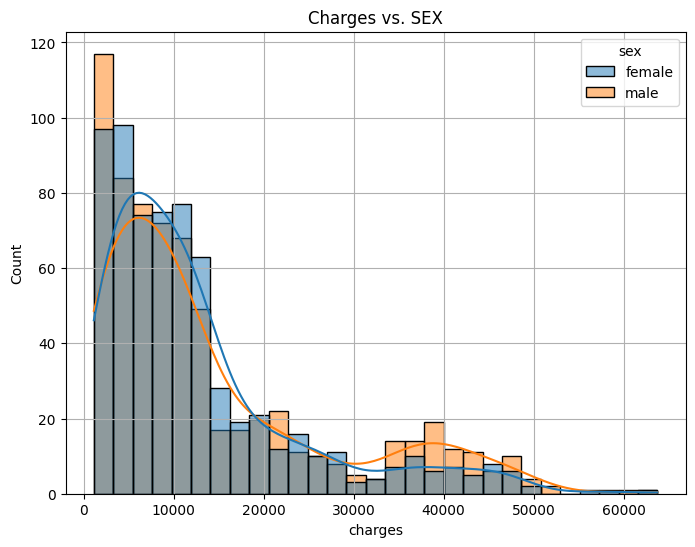

In [ ]:
# Using the charges_vs_category() function compare the charges against the gender
charges_vs_category(df=df_insurance, col='sex')

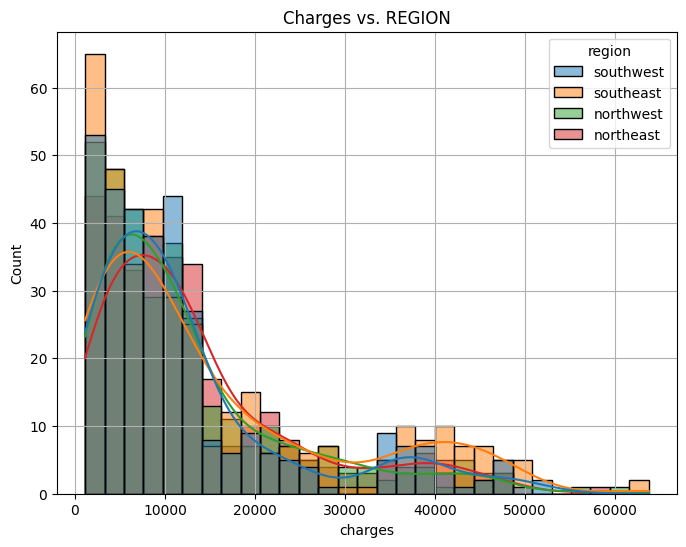

In [ ]:
# Using the charges_vs_category() function plot the charges per region
charges_vs_category(df=df_insurance, col='region')

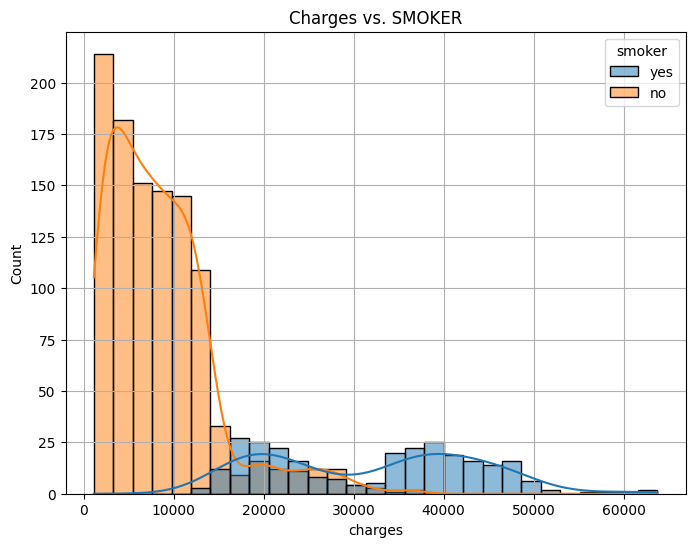

In [ ]:
# Using the charges_vs_category() function plot the charges per smoker vs. non-smokers
charges_vs_category(df=df_insurance, col='smoker')

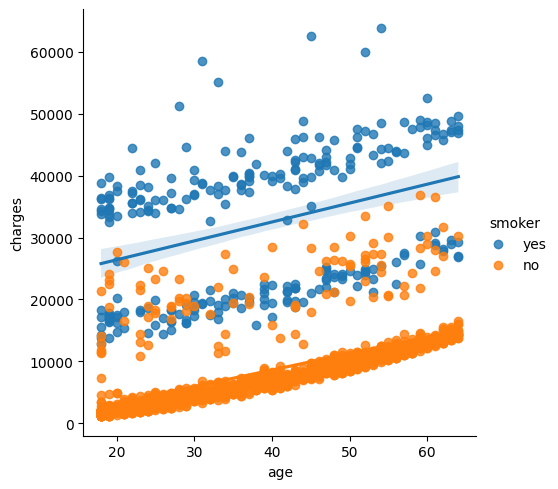

In [ ]:
# We can visually explore how a specific feature can be fitted by using linear regression.
# Use seaborns' lmplot() to compare charges vs. ages
sns.lmplot(data=df_insurance, x='age', y='charges', hue='smoker')

<ipython-input-24-8c1934df014e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_insurance.corr()


<Axes: >

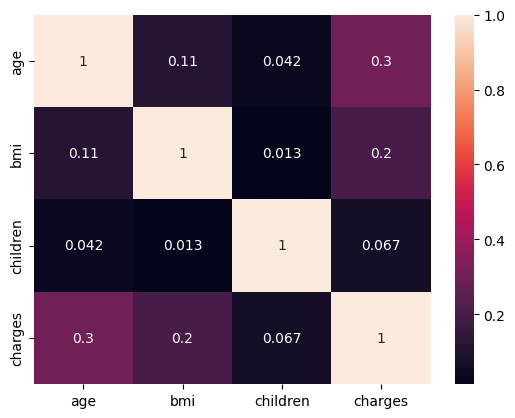

In [ ]:
# Next, we plot the correlation among the variables to potentially see their dependences.
# Hint: have a look at the datafrane method .corr(). In addition, to plot the correlation matrix, you can refer to the function heatmap() from seaborn.
corr = df_insurance.corr()
sns.heatmap(corr, annot= True)

## 3 - Preparing the Dataset

In [ ]:
df_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# display the different column types in the dataframe
df_insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
# As seen above, there are some columns, which are of type 'object'. Let's
# change their datatypes to 'category'. This will be useful later on, when encoding our variables.

df_insurance['sex'] = df_insurance['sex'].astype('category')
df_insurance['smoker'] = df_insurance['smoker'].astype('category')
df_insurance['region'] = df_insurance['region'].astype('category')

df_insurance.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [ ]:
# As we have seen from our data, not all the features are of numeric type. Therefore,
# we rely on encoding mechanisms to map those string values to numeric types.
# We will be using sklearn.preprocessing tools.
# Hint: have a look at the LabelEncoder() to convert category labels into numerical ones
from sklearn.preprocessing import LabelEncoder # import the corresponding encoder
label_encoder = LabelEncoder() # initialise the encoder

In [ ]:
# Once again, we plot our dataframe values
print(df_insurance)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]


In [ ]:
# By using our encoder, we encode the 'gender/sex' column.
# Then plot the unique values after the encoding process.
df_insurance['sex'] = label_encoder.fit_transform(df_insurance['sex'])
print(df_insurance['sex'].unique())
print(df_insurance)

[0 1]
      age  sex     bmi  children smoker     region      charges
0      19    0  27.900         0    yes  southwest  16884.92400
1      18    1  33.770         1     no  southeast   1725.55230
2      28    1  33.000         3     no  southeast   4449.46200
3      33    1  22.705         0     no  northwest  21984.47061
4      32    1  28.880         0     no  northwest   3866.85520
...   ...  ...     ...       ...    ...        ...          ...
1333   50    1  30.970         3     no  northwest  10600.54830
1334   18    0  31.920         0     no  northeast   2205.98080
1335   18    0  36.850         0     no  southeast   1629.83350
1336   21    0  25.800         0     no  southwest   2007.94500
1337   61    0  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]


In [ ]:
# By using our encoder, we encode the 'smoker' column.
# Then plot the unique values after the encoding process.
df_insurance['smoker'] = ...
print(df_insurance['smoker'].unique())
print(df_insurance)

[1 0]
      age  sex     bmi  children  smoker     region      charges
0      19    0  27.900         0       1  southwest  16884.92400
1      18    1  33.770         1       0  southeast   1725.55230
2      28    1  33.000         3       0  southeast   4449.46200
3      33    1  22.705         0       0  northwest  21984.47061
4      32    1  28.880         0       0  northwest   3866.85520
...   ...  ...     ...       ...     ...        ...          ...
1333   50    1  30.970         3       0  northwest  10600.54830
1334   18    0  31.920         0       0  northeast   2205.98080
1335   18    0  36.850         0       0  southeast   1629.83350
1336   21    0  25.800         0       0  southwest   2007.94500
1337   61    0  29.070         0       1  northwest  29141.36030

[1337 rows x 7 columns]


In [ ]:
# By using our encoder, we encode the 'region' column.
# Then plot the unique values after the encoding process.
df_insurance['region'] = ...
print(df_insurance['region'].unique())
print(df_insurance)

[3 2 1 0]
      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1337 rows x 7 columns]


In [ ]:
# Once, we have encoded each categorical column, we will see that their corresponding data types is now numeric
df_insurance.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

## 4 - Fitting the Model

### Linear Regression

We can skip several preceding steps by leveraging built-in functionalities of the `scikit-learn` toolbox. In this instance, we load the Iris dataset and perform a split, allocating $20\%$ of the data for testing and $80\%$ for training:

In [ ]:
print(df_insurance)

      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1337 rows x 7 columns]


In [ ]:
# Before splitting our data, into training and test set, we shuffle it.
# Hint have a look at the method named sample()
df_insurance = df_insurance.sample(frac=1, random_state=1)
print(df_insurance)

      age  sex     bmi  children  smoker  region      charges
629    44    0  38.950         0       1       1  42983.45850
1087   57    1  31.540         0       0       1  11353.22760
283    55    0  32.395         1       0       0  11879.10405
790    39    0  41.800         0       0       2   5662.22500
594    41    1  40.260         0       0       2   5709.16440
...   ...  ...     ...       ...     ...     ...          ...
716    49    0  22.610         1       0       1   9566.99090
906    27    1  32.585         3       0       0   4846.92015
1097   22    1  33.770         0       0       2   1674.63230
235    40    0  22.220         2       1       2  19444.26580
1062   59    1  41.140         1       1       2  48970.24760

[1337 rows x 7 columns]


In [ ]:
# Now, let's prepare our X-features and also their corresponding y-variables.
# Therefore, access the features and assign them to a variable 'X'.
# In addition, get the target values to the variable 'y'
X = df_insurance.drop("charges", axis=1)
y = df_insurance["charges"]
print(X)
print(y)

      age  sex     bmi  children  smoker  region
629    44    0  38.950         0       1       1
1087   57    1  31.540         0       0       1
283    55    0  32.395         1       0       0
790    39    0  41.800         0       0       2
594    41    1  40.260         0       0       2
...   ...  ...     ...       ...     ...     ...
716    49    0  22.610         1       0       1
906    27    1  32.585         3       0       0
1097   22    1  33.770         0       0       2
235    40    0  22.220         2       1       2
1062   59    1  41.140         1       1       2

[1337 rows x 6 columns]
629     42983.45850
1087    11353.22760
283     11879.10405
790      5662.22500
594      5709.16440
           ...     
716      9566.99090
906      4846.92015
1097     1674.63230
235     19444.26580
1062    48970.24760
Name: charges, Length: 1337, dtype: float64


In [ ]:
# Split the (X,y)-annotated dataset onto a training a test dataset, by using 80%
# samples for training and 20% samples for testing. Also shuffle the samples.
# For that purposes, we will use the 'train_test_split' function contained in sklearn.model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# We also will learn how to normalise the data using sklearn.
# This is very important, so as to give each of the features the same relevance.
# Thus, we use the standard scaler from sklearn preprocessing

from sklearn.preprocessing import StandardScaler # import the corresponding feature scaler from sklearn.preprocessing

# Next, we scale the features using StandardScaler
scaler = StandardScaler() # initialise the scaler
X_train = scaler.fit_transform(X_train) # fit the scaler to the training dataset
X_test = scaler.transform(X_test) # apply the scaler onto the test dataset.

In [ ]:
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (1069, 6)
y_train.shape: (1069,)
X_test.shape: (268, 6)
y_test.shape: (268,)


In [ ]:
print(X_train)

[[-1.3682075  -1.01793442 -0.26451447 -0.89978353 -0.51486771 -0.45984637]
 [ 0.56845932  0.98238156  0.288362   -0.06045666 -0.51486771  1.34741748]
 [-1.2964791  -1.01793442  1.48390541 -0.89978353 -0.51486771  0.44378556]
 ...
 [ 0.56845932 -1.01793442 -0.19883441 -0.06045666 -0.51486771  0.44378556]
 [-1.2247507   0.98238156 -0.89637329 -0.89978353 -0.51486771 -0.45984637]
 [ 1.21401493 -1.01793442 -0.65942624 -0.06045666 -0.51486771 -0.45984637]]


In [ ]:
print(X_test)

[[ 0.71191612  0.98238156 -0.785798   -0.06045666 -0.51486771 -1.36347829]
 [-1.5116643  -1.01793442 -0.91216977 -0.89978353 -0.51486771 -1.36347829]
 [ 0.13808891  0.98238156  0.4962103  -0.89978353 -0.51486771  0.44378556]
 ...
 [-1.1530223  -1.01793442  1.44732411  0.77887021 -0.51486771  0.44378556]
 [-1.0812939  -1.01793442 -0.4931476  -0.89978353 -0.51486771  1.34741748]
 [ 1.21401493 -1.01793442 -0.87558847 -0.89978353 -0.51486771  1.34741748]]


We use the `LinearRegression` class provided by scikit-learn to create a new Linear Regressor object named `linreg`. We proceed to use this object to "fit" the training dataset:

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

Next, we can plot the learned parameters. Remember that the parameter $w_{0}$ relates to the intercept or bias term, whilst the other learned parameters $w_{i}$ correspond to the weighting of the given column/feature $i$.

In [ ]:
print(linreg.intercept_)
print(linreg.coef_)

13265.979426060805
[3683.87664812  -28.64044797 1938.20779109  632.31324679 9663.03589502
 -489.27998453]


In [ ]:
# We plot the estimated model parameters:
print('y = ' + str('%.3f' % linreg.intercept_) + ' + ' + str('%.3f' % linreg.coef_[0]) + '*x1 ' + str('%.3f' % linreg.coef_[1]) + '*x2 ' +
      str('%.3f' % linreg.coef_[2]) + '*x3 + ' + str('%.3f' % linreg.coef_[3]) + '*x4 + ' + str('%.3f' % linreg.coef_[4]) + '*x5 + ' +
      str('%.3f' % linreg.coef_[5]) + '*x6 ')

y = 13265.979 + 3683.877*x1 -28.640*x2 1938.208*x3 + 632.313*x4 + 9663.036*x5 + -489.280*x6 


In [ ]:
score = linreg.score(X_test, y_test)
print(score)

0.727627818286332


In [ ]:
# Next, we display some statistical results. Namely, we compute the Mean-squarred error values obtained after fitting the model onto the training dataset and the test dataset.
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

linreg_train_pred = linreg.predict(X_train) # Get the predictions from the linear model on the training dataset.
linreg_test_pred = linreg.predict(X_test) # Get the predictions from the linear model on the test dataset.


msqe_train = np.sqrt(mean_squared_error(y_train, linreg_train_pred)).round(4) # Get the mean_squared_error between the real target predictions from the training dataset y_train and the corresponding predicted values.
msqe_test = np.sqrt(mean_squared_error(y_test, linreg_test_pred)).round(4) # Get the mean_squared_error between the real target predictions from the test dataset y_test and the corresponding predicted values.
print('MSE train data: %.3f, MSE test data: %.3f' % (msqe_train,msqe_test))

r2_train = r2_score(y_train, linreg_train_pred) # Compute the R2 score values on the training dataset.
r2_test = r2_score(y_test, linreg_test_pred) # Compute the R2 score values on the test dataset.

print('R2 train data: %.3f, R2 test data: %.3f' % (r2_train, r2_test))

MSE train data: 5958.523, MSE test data: 6395.302
R2 train data: 0.756, R2 test data: 0.728


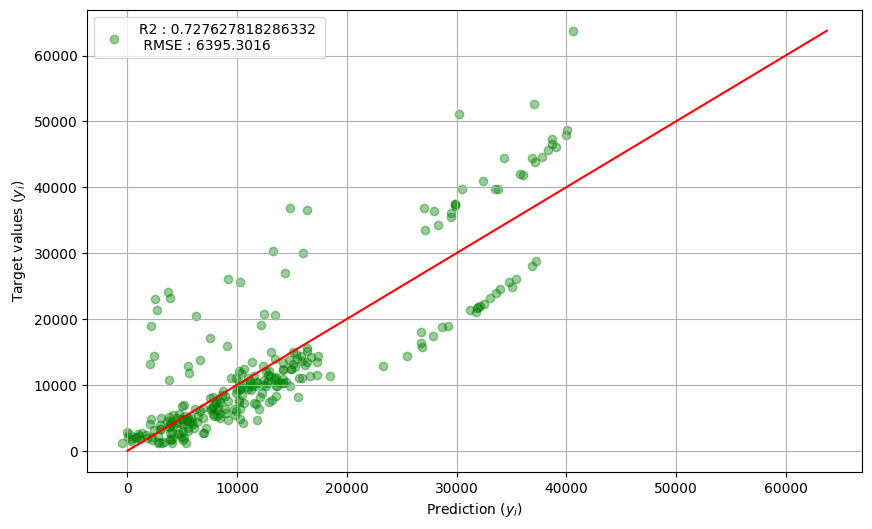

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(linreg_test_pred, y_test, color='green', alpha=0.4)
plt.plot(np.arange(max(y_test.values)), np.arange(max(y_test.values)), '-' , color='r' )
plt.xlabel('Prediction ($y_i$)')
plt.ylabel('Target values ($y_i$)')
plt.grid()
plt.legend([f'R2 : {r2_test} \n RMSE : {msqe_test}'] , loc='upper left')

### Polynomial Regression

In this part, we will learn how to use the Polynomial Regressor. Recall that not all regression problems involve linear relationships between the dependent and independent variables.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures # Import the Polynomial regression from sklearn

X = df_insurance.drop(['charges', 'sex', 'region'], axis = 1) # We are going to apply the polynomial regressor after excluding the charges, sex, and region columns.
y = df_insurance["charges"]
print(df_insurance.shape)
print(X.shape)
print(y.shape)

(1337, 7)
(1337, 4)
(1337,)


In [ ]:
poly = PolynomialFeatures(degree=2) # Initialise a Polynomial Regressor with degree set to 2
X_Poly = poly.fit_transform(X) # Fit the regressor on the features X
X_Poly.shape

(1337, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_Poly, y, test_size=0.2, random_state = 0) # Now, we split our (X,y) dataset onto training and test datasets.

In [ ]:
# As in the previous case, it's important to normalise our features prior to fitting the models.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
pol_reg = LinearRegression() # Initiliase a linear regressor
pol_reg.fit(X_train, y_train) # Fit the regressor onto the new training dataset.

LinearRegression()

In [ ]:
# Plot the learned coefficients
print(pol_reg.intercept_)
print(pol_reg.coef_)

13265.979426060798
[    0.           149.20975322  1958.57797356  2108.75736535
 -4090.3084405   3393.6501422    295.33309744  -293.88934737
   -49.22416136 -2002.33482373  -381.57316743 18536.11493961
  -667.32268849  -313.89937055 -4090.3084405 ]


In [ ]:
# Compute the errors
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

polreg_train_pred = pol_reg.predict(X_train)
polreg_test_pred = pol_reg.predict(X_test)


msqe_train = np.sqrt(mean_squared_error(y_train, polreg_train_pred)).round(4)
msqe_test = np.sqrt(mean_squared_error(y_test, polreg_test_pred)).round(4)
print('MSE train data: %.3f, MSE test data: %.3f' % (msqe_train, msqe_test))

r2_train = r2_score(y_train, polreg_train_pred)
r2_test = r2_score(y_test, polreg_test_pred)

print('R2 train data: %.3f, R2 test data: %.3f' % (r2_train, r2_test))

MSE train data: 4782.354, MSE test data: 4878.866
R2 train data: 0.843, R2 test data: 0.841


In [ ]:
print(pol_reg.score(X_test, y_test))

0.8414820365453946


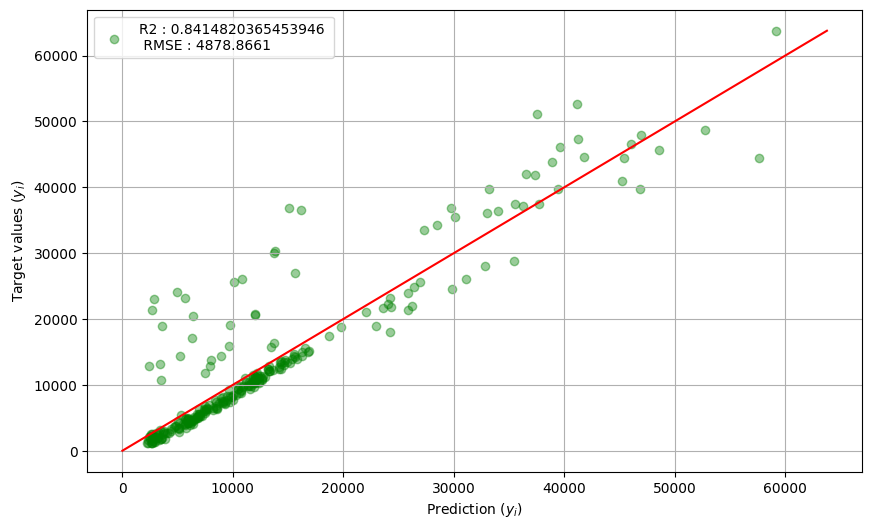

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(polreg_test_pred, y_test, color='green', alpha=0.4)
plt.plot(np.arange(max(y_test.values)), np.arange(max(y_test.values)), '-' , color='r' )
plt.xlabel('Prediction ($y_i$)')
plt.ylabel('Target values ($y_i$)')
plt.grid()
plt.legend([f'R2 : {r2_test} \n RMSE : {msqe_test}'] , loc='upper left')